# Support Vector Machines

In [366]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [160]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [161]:
diabetes_df = pd.read_csv("diabetes.csv")

In [162]:
# Eye ball the imported dataset

### Check dimension of dataset

In [163]:
diabetes_df.shape

(768, 9)

In [164]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

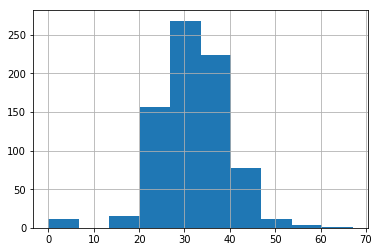

In [165]:
diabetes_df['BMI'].hist()

In [166]:
diabetes_df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
30.8     9
32.9     9
30.1     9
29.7     8
33.6     8
34.2     8
30.4     7
35.5     7
27.6     7
33.2     7
28.7     7
25.9     7
39.4     7
30.0     7
30.5     7
27.8     7
25.2     6
36.8     6
28.9     6
34.9     6
24.2     6
34.3     6
38.5     6
        ..
21.7     1
21.2     1
43.1     1
45.4     1
40.7     1
45.2     1
24.1     1
44.1     1
29.2     1
38.6     1
67.1     1
41.2     1
26.7     1
48.8     1
49.6     1
46.7     1
41.8     1
22.7     1
24.9     1
40.8     1
57.3     1
31.1     1
53.2     1
46.3     1
36.2     1
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

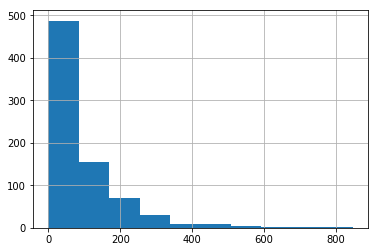

In [167]:
diabetes_df['Insulin'].hist()

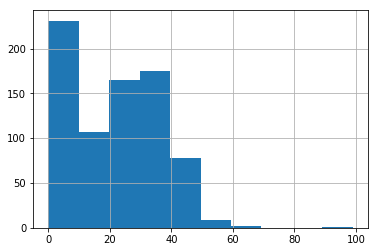

In [168]:
diabetes_df['SkinThickness'].hist()

In [169]:
diabetes_df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [170]:

diabetes_df['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [171]:
diabetes_df['BMI'].mode()

0    32.0
dtype: float64

In [172]:
# Treating zero blood pressure with average BP
diabetes_df.BloodPressure.loc[diabetes_df['BloodPressure'] ==0] = diabetes_df.BloodPressure.mean()
diabetes_df.Glucose.loc[diabetes_df['Glucose'] ==0] = diabetes_df.Glucose.mean()
diabetes_df.SkinThickness.loc[diabetes_df['SkinThickness'] ==0] = diabetes_df.SkinThickness.mean()
diabetes_df.Insulin.loc[diabetes_df['Insulin'] ==0] = diabetes_df.Insulin.mean()
diabetes_df['BMI']=diabetes_df['BMI'].fillna(0)
diabetes_df['BMI']=diabetes_df['BMI'].replace(0.0,32.0)
diabetes_df['BMI']=diabetes_df['BMI'].replace(0,32)
diabetes_df['BMI'] = diabetes_df['BMI'].fillna(lambda x: 32)
diabetes_df.BMI.loc[diabetes_df['BMI'] ==0] = diabetes_df.BMI.mode()
diabetes_df['BloodPressure']=diabetes_df['BloodPressure'].astype(int)
diabetes_df['Glucose']=diabetes_df['Glucose'].astype(int)
diabetes_df['SkinThickness']=diabetes_df['SkinThickness'].astype(int)
diabetes_df['Insulin']=diabetes_df['Insulin'].astype(int)


C:\Users\kotav\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [173]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int32
BloodPressure               768 non-null int32
SkinThickness               768 non-null int32
Insulin                     768 non-null int32
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int32(4), int64(3)
memory usage: 42.1 KB


In [174]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [175]:
# Check data types and info of dataset
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.675781,30.436252,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,26.447917,9.733872,7.000,20.00000,23.0000,32.00000,99.00
Insulin,768.0,118.270833,93.243829,14.000,79.00000,79.0000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Check data distribution using summary statistics and provide your findings(2 Marks)

 Min values for Pregnancies,Glucose,BloodPressure, SkinThickness, Insulin,BMI
    
These cannot be 0, either we treat them or drop the data

Treated the zero values with mean and mode

Insulin has outliers as Q3 is 127.2 AND mas is 846

we need to treat this

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

C:\Users\kotav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kotav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kotav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


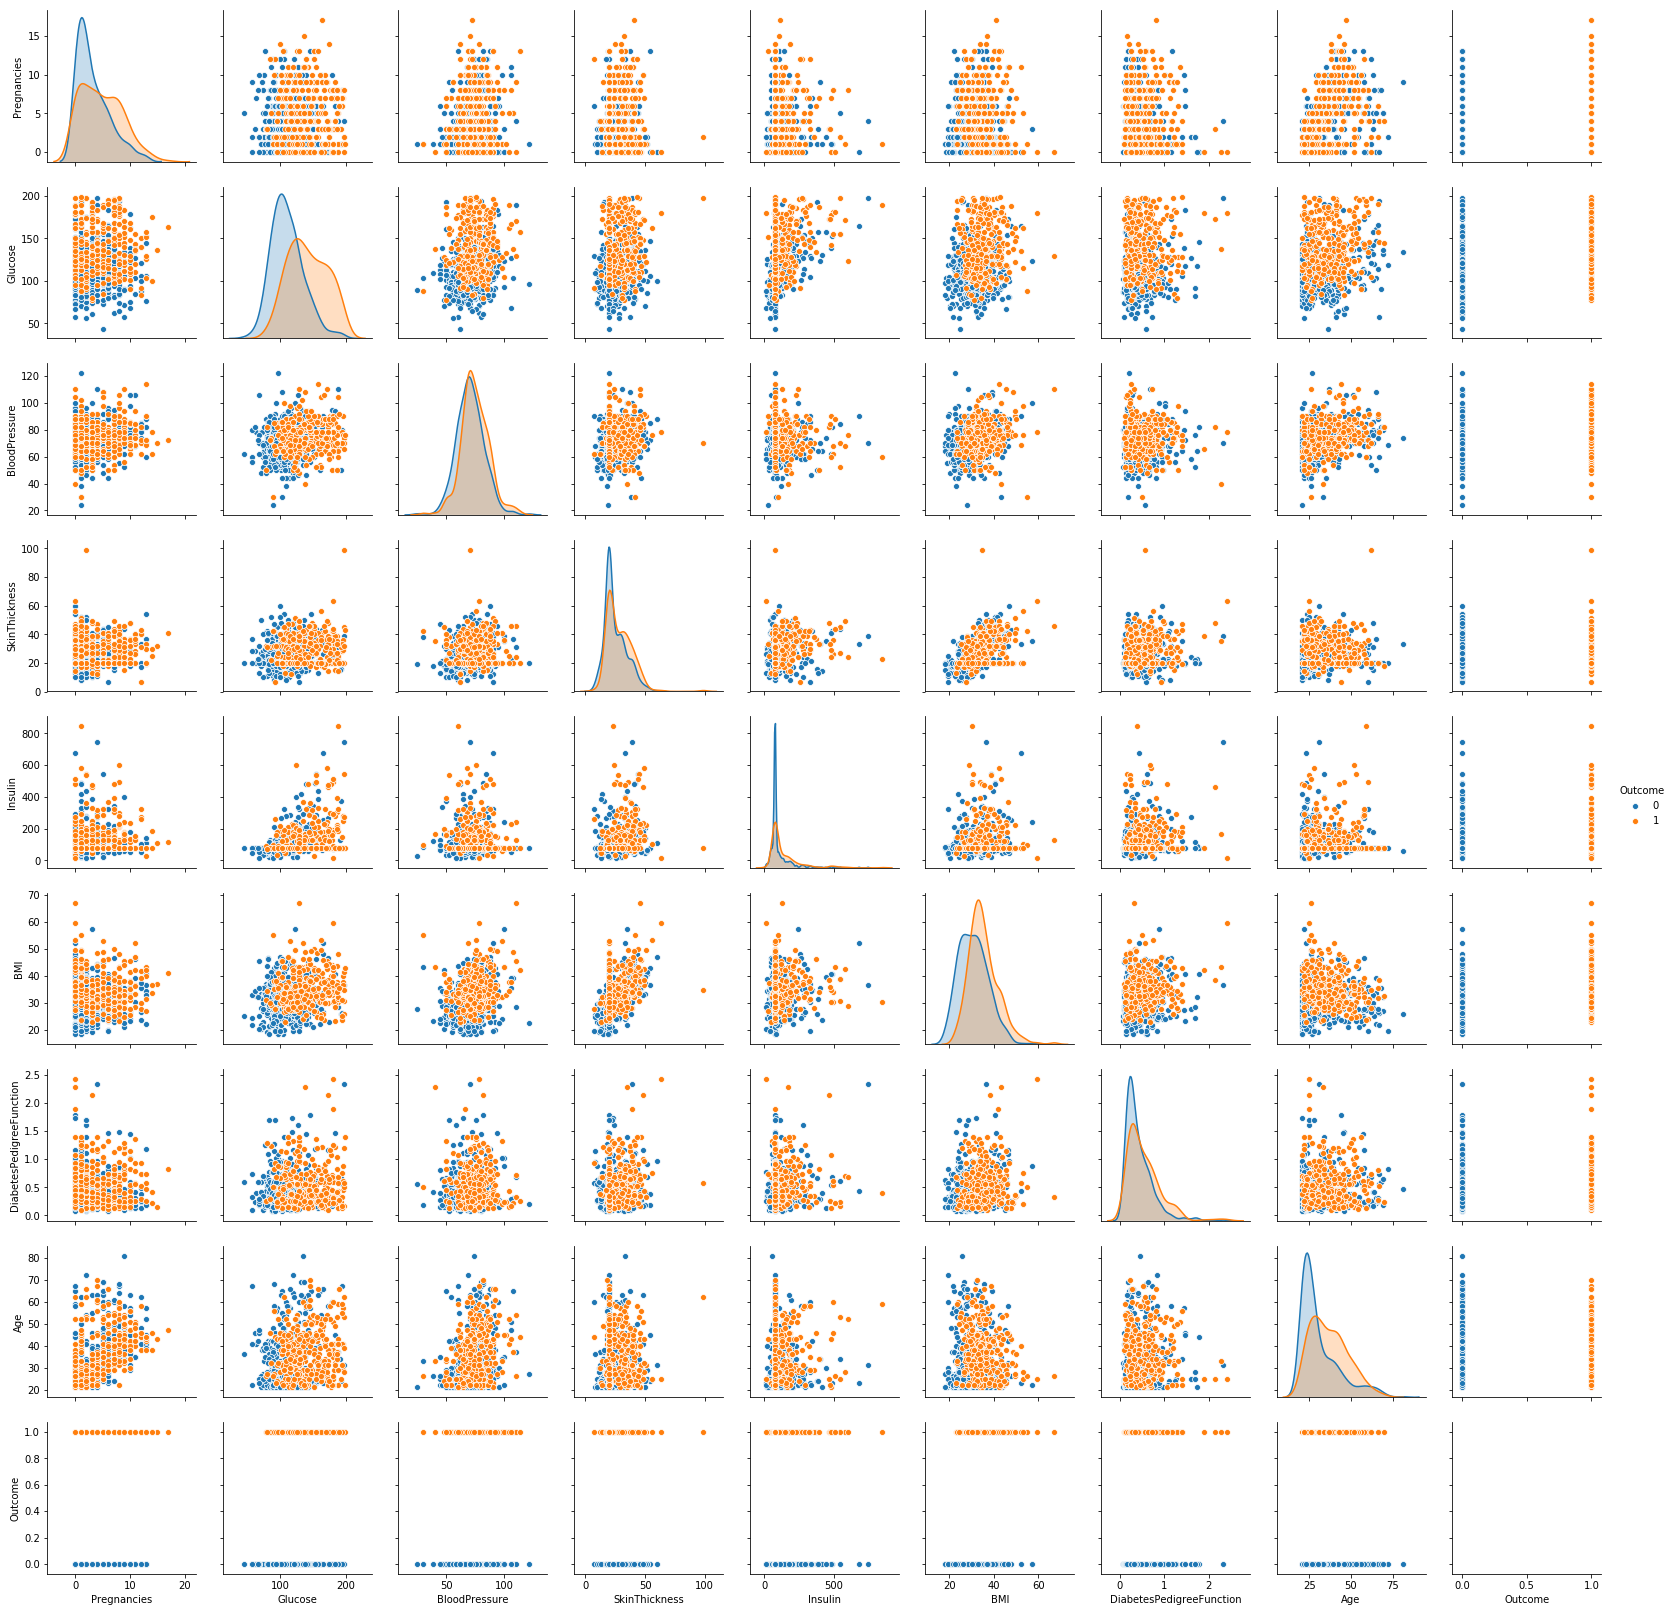

In [176]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(diabetes_df, hue = "Outcome" ,diag_kind='kde')

#There are 2 Gaussian curves in the diagnol show there could be 2 categories

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [177]:
X=diabetes_df.drop('Outcome', axis=1)
y=diabetes_df["Outcome"]

In [178]:
X.head()
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [180]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,154.0,3.883117,3.303688,0.000,1.0000,3.0000,5.75000,14.000
Glucose,154.0,119.779221,27.280256,67.000,100.0000,116.5000,136.00000,189.000
BloodPressure,154.0,71.305195,11.821841,44.000,62.0000,70.0000,78.00000,110.000
SkinThickness,154.0,26.500000,9.758020,7.000,20.0000,22.0000,32.00000,60.000
Insulin,154.0,112.194805,68.260274,23.000,79.0000,79.0000,135.00000,480.000
BMI,154.0,33.172078,7.050625,20.000,27.6250,32.6000,37.50000,52.900
DiabetesPedigreeFunction,154.0,0.508519,0.347545,0.088,0.2475,0.3985,0.68525,1.893
Age,154.0,33.370130,11.791185,21.000,24.0000,30.0000,38.00000,69.000


In [181]:
diabetes_df['BMI'].value_counts()

32.0    24
31.6    12
31.2    12
33.3    10
32.4    10
32.8     9
30.8     9
30.1     9
32.9     9
29.7     8
33.6     8
34.2     8
28.7     7
30.5     7
27.6     7
30.0     7
33.2     7
25.9     7
35.5     7
30.4     7
39.4     7
27.8     7
24.2     6
38.5     6
32.5     6
25.0     6
34.9     6
25.2     6
25.6     6
28.4     6
        ..
21.7     1
21.2     1
43.1     1
45.4     1
40.7     1
45.2     1
24.1     1
44.1     1
29.2     1
38.6     1
67.1     1
41.2     1
26.7     1
48.8     1
49.6     1
46.7     1
42.8     1
22.7     1
24.9     1
40.8     1
57.3     1
31.1     1
53.2     1
46.3     1
36.2     1
32.1     1
52.9     1
31.3     1
45.7     1
41.8     1
Name: BMI, Length: 247, dtype: int64

### Train Support Vector Machine Model(1 Marks)

In [182]:
from sklearn.svm import SVC
# use from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [183]:
# your insights
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7785016286644951
0.7142857142857143


In [184]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[82 31]
 [13 28]]


### Scale the data points using MinMaxScaler ( 1 Marks)

In [185]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,20,79,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,20,79,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,20,79,32.0,0.232,54,1


In [194]:
df_scale=diabetes_df.iloc[:,:8]

In [195]:
df_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,79,33.6,0.627,50
1,1,85,66,29,79,26.6,0.351,31
2,8,183,64,20,79,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [196]:
from sklearn import preprocessing
est1 =preprocessing.MinMaxScaler()

diabetes_scaled = est1.fit_transform(df_scale)
diabetes_df_scale= diabetes_df.copy()
diabetes_df_scale[df_scale.columns]=diabetes_scaled

C:\Users\kotav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [197]:
diabetes_df_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.078125,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [198]:
X=diabetes_df_scale.drop('Outcome', axis=1)
y=diabetes_df_scale.pop("Outcome")

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [200]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [201]:
# your insights
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7638436482084691
0.6948051948051948


In [202]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[91 43]
 [ 4 16]]


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [210]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 1000, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [211]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7768729641693811
0.7142857142857143


In [212]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[82 31]
 [13 28]]


Mode with C=1000 improved the Model Accuracy in traing from 76 to 77, test metrics 69 to 71

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [213]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [214]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [215]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [216]:
gs.fit(X_train, y_train) 

C:\Users\kotav\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [217]:
gs.best_estimator_

SVC(C=1.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [218]:
gs.best_score_ 

0.7817589576547231

# Content Based Recommendation System

**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [219]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\kotav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [220]:
books.shape

(271360, 8)

In [221]:
users.shape

(278858, 3)

In [222]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [223]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [227]:
books_filtered=books.iloc[:,:5]

In [233]:
books_filtered.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

**yearOfPublication**

### Check unique values of yearOfPublication


In [267]:
books_filtered['yearOfPublication'].value_counts()

2002    17627
1999    17431
2001    17359
2000    17232
1998    15766
1997    14890
2003    14358
1996    14030
1995    13546
1994    11796
1993    10602
1992     9906
1991     9389
1990     8660
1989     7936
1988     7492
1987     6529
1986     5841
2004     5839
1985     5343
1984     4986
0        4618
1983     4499
1982     4197
1981     3279
1980     2676
1979     2208
1978     2131
1977     1897
1976     1597
        ...  
2010        2
1902        2
1909        2
1924        2
2050        2
1921        2
1922        2
1925        2
1926        2
1927        2
1928        2
1904        1
2026        1
1806        1
1376        1
1378        1
1897        1
2024        1
2008        1
1934        1
1908        1
1906        1
2012        1
2021        1
1910        1
1914        1
1917        1
1919        1
2037        1
2038        1
Name: yearOfPublication, Length: 116, dtype: int64

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [237]:
books_filtered[books_filtered['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [238]:
books_filtered[books_filtered['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [249]:
indexNames =books_filtered[(books_filtered['yearOfPublication']=='Gallimard') | (books_filtered['yearOfPublication']=='DK Publishing Inc' )].index
books_filtered=books_filtered.drop(indexNames)

In [250]:
books_filtered[books_filtered['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [253]:
books_filtered['yearOfPublication']=books_filtered['yearOfPublication'].astype(int)

In [304]:
books_filtered.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [325]:
books_filtered.shape

(271355, 5)

### Drop NaNs in `'publisher'` column


In [276]:
books_filtered=books_filtered.dropna(subset=['publisher'])

In [277]:
books_filtered['publisher'].isna().sum()

0

In [278]:
books_filtered.shape

(271355, 5)

## Exploring Users dataset

In [279]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [280]:
users.shape

(278858, 3)

### Get all unique values in ascending order for column `Age`

In [282]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
userID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


In [281]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

In [287]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
userID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [289]:
users.loc[users['Age'] <5 ]=np.nan

In [290]:
users.loc[users['Age'] >90 ]=np.nan

In [291]:
users.loc[users['Age'] <5 ]

,userID,Location,Age


### Replace null values in column `Age` with mean

In [293]:
int(users['Age'].mean())

34

In [295]:
users['Age']=users['Age'].fillna(int(users['Age'].mean()))

In [296]:
users['Age'].isna().sum()

0

### Change the datatype of `Age` to `int`

In [299]:
users['Age']=users['Age'].astype(int)

In [300]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [301]:
ratings.shape

(1149780, 3)

In [302]:
n_users = users.shape[0]
n_books = books_filtered.shape[0]

In [372]:
books_filtered.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [328]:
books_rating = pd.merge(ratings,books_filtered, on='ISBN', how='inner')

In [332]:
books_rating.shape

(1031130, 7)

In [330]:
books_rating.tail()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
1031125,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031126,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031127,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031128,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA
1031129,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997,Sterling Publishing


In [331]:
.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [333]:
users_books_rating= pd.merge(books_rating,users, on='userID', how='inner')

In [335]:
users_books_rating.shape

(1026151, 9)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [337]:
users_books_rating_filtered=users_books_rating.loc[users_books_rating['bookRating'] >0]

In [343]:
users_books_rating_filtered.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23


In [339]:
users_books_rating_filtered['bookRating'].value_counts()

8     91365
10    70963
7     66101
9     60497
5     45154
6     31551
4      7576
3      5082
2      2360
1      1465
Name: bookRating, dtype: int64

### Find out which rating has been given highest number of times

In [342]:
users_books_rating_filtered['bookRating'].value_counts().sort_values(ascending=False)

8     91365
10    70963
7     66101
9     60497
5     45154
6     31551
4      7576
3      5082
2      2360
1      1465
Name: bookRating, dtype: int64

Rating of 8 is the hightes number of times - 91365


### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [344]:
users_books_rating_filtered['userID'].value_counts().sort_values(ascending=False)

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
25127        1
10760        1
49715        1
64052        1
31234        1
39480        1
213571       1
14892        1
164189       1
72456        1
229757       1
213349       1
152243       1
242525       1
187248       1
183154       1
227682       1
250705       1
270174       1
263083       1
223584       1
271279       1
136088       1
84994        1
166568       1
164521       1
78605        1
252752       1
211788       1
264139       1
Name: userID, Length: 67796, dtype: int64

In [349]:
users_books_rating_filtered_n=users_books_rating_filtered.groupby('userID').filter(lambda x: len(x) >=  100)

In [350]:
users_books_rating_filtered_n['userID'].value_counts().sort_values(ascending=False)

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
250405     104
113270     104
183958     104
35836      104
164096     104
163804     104
2110       103
132492     103
164323     103
86189      102
148966     102
76223      102
235935     102
10560      102
193898     102
172888     101
117384     101
146113     101
224525     101
109901     101
66942      101
211919     100
208406     100
156300     100
36299      100
26544      100
169682     100
36609      100
33145      100
95010      100
Name: userID, Length: 447, dtype: int64

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [360]:
users_books_rating_filtered_n.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa",34
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa",34
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa",34
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa",34
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa",34


In [363]:
#users_books_rating_filtered_n=users_books_rating_filtered_n.fillna(0)
R_df = users_books_rating_filtered_n.pivot(index = 'userID', columns ='ISBN', values = 'bookRating').fillna(0)
R_df.tail()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
R_df.index

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='userID', length=447)

In [364]:
users_books_rating_filtered_n.shape

(102975, 9)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [365]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [367]:
U.shape
sigma.shape
Vt.shape

(447, 50)

(50,)

(50, 66423)

In [368]:
#diag
sigma = np.diag(sigma)

In [369]:
sigma.shape

(50, 50)

In [370]:
#I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [371]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025351,-0.002174,-0.001449,-0.002174,-0.002174,0.002987,-0.003932,0.007030,0.007030,0.012337,...,0.000181,0.000227,0.042173,-0.016820,-0.080209,0.004754,0.028294,0.000121,-0.001675,0.067534
1,-0.010009,-0.003679,-0.002452,-0.003679,-0.003679,0.001078,0.001443,-0.003501,-0.003501,0.001613,...,-0.000363,0.000401,0.008203,0.001094,-0.029222,0.000997,0.002360,-0.000242,0.000030,-0.013055
2,-0.015075,-0.015525,-0.010350,-0.015525,-0.015525,0.007305,-0.013975,0.011954,0.011954,0.011908,...,-0.000448,0.001923,0.047933,0.005715,0.118426,0.006996,0.003137,-0.000299,0.009068,-0.057819
3,-0.021511,0.035632,0.023755,0.035632,0.035632,0.030263,0.024293,-0.000977,-0.000977,0.067608,...,0.002977,0.009925,0.085647,-0.008699,0.017034,0.028873,-0.000043,0.001985,0.031172,-0.046818
4,0.002056,-0.008016,-0.005344,-0.008016,-0.008016,0.002961,0.003092,0.000234,0.000234,0.006160,...,0.002124,0.001608,-0.012244,0.009408,0.673979,0.002633,-0.008211,0.001416,0.004959,0.047685


In [384]:
sorted_user_predictions = .iloc[0].sort_values(ascending=False)

In [386]:
preds_df.index

RangeIndex(start=0, stop=447, step=1)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [392]:
R_df.index

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='userID', length=447)

In [401]:
userID = 446#USER ID =278418

In [402]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [403]:
# return the books with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_books(predictions_df, userID, books_filtered, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID  # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the books information.
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    #Added title and genres
    user_full = (user_data.merge(books_filtered, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )

    print ('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating books that the user hasn't seen yet.
    recommendations = (books_filtered[~books_filtered['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df,  userID, books_filtered, ratings, 10)

User 446 has already rated 28 books.
Recommending the highest 10 predicted ratings movies not already rated.


In [404]:
sorted_user_predictions

ISBN
042518630X    0.239230
051513287X    0.236507
0515131229    0.218514
0515128554    0.208901
0515128546    0.202384
0515126772    0.201857
0425173631    0.185003
0515130389    0.179225
0373483503    0.174756
0373218192    0.173345
0679751521    0.170212
0515116750    0.166109
051513628X    0.161734
0451167317    0.158303
0380759497    0.157505
0515132020    0.154985
0515136530    0.154591
0373218397    0.154297
042513525X    0.153628
0425157628    0.153131
0373484224    0.151873
0553265741    0.151595
0451151259    0.151291
0515136379    0.149479
0399149848    0.149104
0373218036    0.148640
0373483694    0.148541
043935806X    0.147479
051511779X    0.146182
0515114006    0.144225
                ...   
1558748865   -0.019431
1582341591   -0.019447
0399143947   -0.019796
0440505941   -0.019933
0743418166   -0.020179
0385507607   -0.020365
0553234811   -0.020390
0684855631   -0.020437
082177591X   -0.020793
0399145362   -0.021262
0380815265   -0.021481
0140119906   -0.021564
038531

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [405]:
already_rated

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,446,0026329859,10,From the Earth: Chinese Vegetarian Cooking,Eileen Yin-Fei Lo,1995.0,MacMillan Publishing Company.
6,446,0061000280,10,The Fly on the Wall,Tony Hillerman,1990.0,HarperTorch
20,446,0553145460,10,NaN,NaN,NaN,NaN
17,446,0486281965,10,The Country of the Pointed Firs (Dover Thrift ...,Sarah Orne Jewett,1994.0,Dover Publications
16,446,0451523318,10,Turn of the Screw and Short N,Henry James,1978.0,Signet Book
21,446,0684824442,9,REEF,Edith Wharton,1996.0,Scribner
27,446,1877727083,8,Vertical Poetry: Recent Poems,Roberto Juarroz,1992.0,White Pine Press (NY)
4,446,0060925000,8,"A Suitable Boy : Novel, A",Vikram Seth,1994.0,Perennial
5,446,0060932759,8,Daughter of Fortune,Isabel Allende,2000.0,Perennial
11,446,0393048977,5,Last Blue: Poems,Gerald Stern,2000.0,W.W. Norton &amp; Company


In [407]:
users.shape

(278858, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [411]:
users.head()

,userID,Location,Age
0,1.0,"nyc, new york, usa",34
1,2.0,"stockton, california, usa",18
2,3.0,"moscow, yukon territory, russia",34
3,4.0,"porto, v.n.gaia, portugal",17
4,5.0,"farnborough, hants, united kingdom",34


In [412]:
user_full_info= pd.merge(already_rated,users, on='userID', how='inner')

In [415]:
already_rated.shape

(28, 7)

In [416]:
books_filtered.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [418]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
0,446,0026329859,10,From the Earth: Chinese Vegetarian Cooking,Eileen Yin-Fei Lo,1995.0,MacMillan Publishing Company.,"chevy chase, dc, usa",34
1,446,0061000280,10,The Fly on the Wall,Tony Hillerman,1990.0,HarperTorch,"chevy chase, dc, usa",34
2,446,0553145460,10,NaN,NaN,NaN,NaN,"chevy chase, dc, usa",34
3,446,0486281965,10,The Country of the Pointed Firs (Dover Thrift ...,Sarah Orne Jewett,1994.0,Dover Publications,"chevy chase, dc, usa",34
4,446,0451523318,10,Turn of the Screw and Short N,Henry James,1978.0,Signet Book,"chevy chase, dc, usa",34


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [428]:
sorted_user_predictions.head(10)

ISBN
042518630X    0.239230
051513287X    0.236507
0515131229    0.218514
0515128554    0.208901
0515128546    0.202384
0515126772    0.201857
0425173631    0.185003
0515130389    0.179225
0373483503    0.174756
0373218192    0.173345
Name: 446, dtype: float64